# Introduction to Matplotlib

## Problem 1. {-}

In [195]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def problem1_1_1(n):
    A = np.random.normal(size=(n,n))
    row_means     = np.mean(A, axis=1)
    var_row_means = np.var(row_means)
    return var_row_means

In [7]:
def problem1_1_2():
    l = []
    for n in range(100,1001,100):
        l.append(problem1_1_1(n))
    l = np.array(l)
    plt.plot(range(100,1001,100),l)
    plt.show()

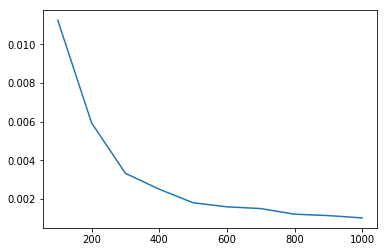

In [8]:
problem1_1_2()

## Problem 2. {-}

In [9]:
def problem1_2():
    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    plt.plot(x, np.sin(x))
    plt.plot(x, np.cos(x))
    plt.plot(x, np.arctan(x))
    plt.show()

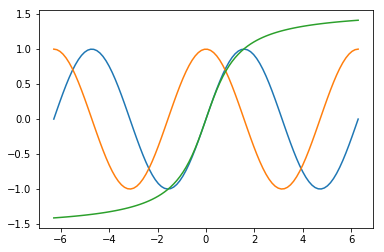

In [10]:
problem1_2()

## Problem 3. {-}

In [11]:
def problem1_3():
    x1 = np.linspace(-2, 1, 100)[:-1]
    f1 = 1 / (x1-1)
    x2 = np.linspace(1, 6, 100)[1:]
    f2 = 1 / (x2-1)
    plt.plot(x1, f1, "m--", lw=4)
    plt.plot(x2, f2, "m--", lw=4)
    plt.xlim(-2, 6)
    plt.ylim(-6, 6)
    plt.show()

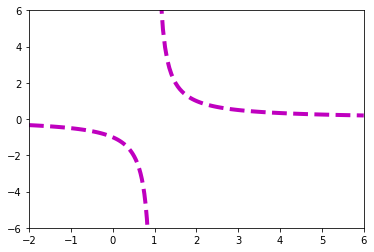

In [12]:
problem1_3()

## Problem 4. {-}

In [13]:
def problem1_4():
    x = np.linspace(0, 2*np.pi, 100)
    y = [np.sin(x), np.sin(2*x), 2*np.sin(x), 2*np.sin(2*x)]
    titles = ["sin(x)", "sin(2x)", "2sin(x)", "2sin(2x)"]
    styles = ["g-", "r--", "b--", "m:"]
    for i in range(4):
        ax = plt.subplot(2,2,i+1)
        ax.plot(x, y[i], styles[i])
        plt.axis([0, 2*np.pi, -2, 2])
        plt.title(titles[i])
        plt.subplots_adjust(hspace=.5, wspace=.3)
    plt.suptitle("The sine function")
    plt.show()

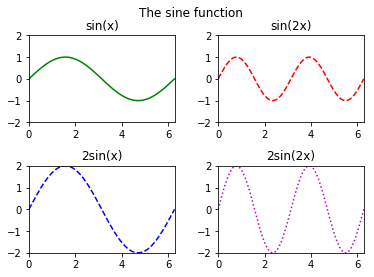

In [14]:
problem1_4()

## Problem 5. {-}

In [15]:
def problem1_5():
    fars = np.load("FARS.npy")
    ax1 = plt.subplot(121)
    ax1.plot(fars.T[1],fars.T[2],"k,")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.axis("equal")
    
    ax2 = plt.subplot(122)
    ax2.hist(fars.T[0], bins=np.arange(0,25))
    plt.xlabel("Hour of crash")
    
    plt.show()

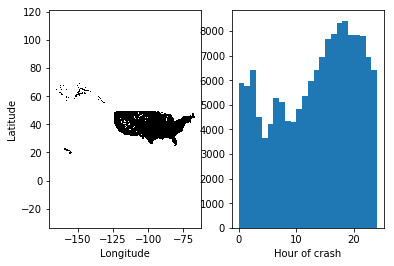

In [16]:
problem1_5()

## Problem 6. {-}

In [17]:
def problem1_6():
    x = np.linspace(-2*np.pi, 2*np.pi, 100)
    y = x.copy()
    X,Y = np.meshgrid(x,y)
    Z = (np.sin(X) * np.sin(Y)) / (X*Y)
    
    plt.subplot(121)
    plt.pcolormesh(X,Y,Z, cmap="magma")
    plt.colorbar()
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    
    plt.subplot(122)
    plt.contour(X,Y,Z, 12, cmap="viridis")
    plt.colorbar()
    plt.axis([-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi])
    
    plt.plot()

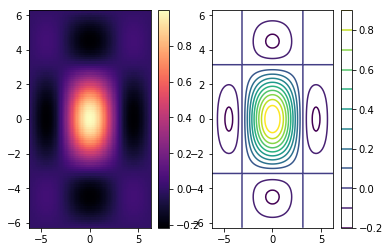

In [18]:
problem1_6()

# Data Visualization 

In [30]:
import scipy

## Problem 1. {-}

In [725]:
def problem2_1():
    ansc = np.load("anscombe.npy")
    x = np.linspace(0,20,100)
    
    comments = [
        "This section looks like a traditional linear relationship with some tight noise. An OLS regression is appropriate.",
        "This section looks like a quadratic relationship would be more appropriate, where a second-order Taylor approximation would better fit the DGP.",
        "This section looks like a perfect linear fit with a considerable outlier that skews the regression.",
        "This section looks like a vertical line of data points, with one outlier to the right side, which skews the regression."
    ]
        
    mean_x = []
    var_x = []
    mean_y = []
    var_y = []
    corr_xy = []
    
    for i in range(0,8,2):
        ax = plt.subplot(2,2,int(i/2+1))
        ax.plot(ansc.T[i],ansc.T[i+1],"ko")
        plt.axis([0,20,0,13])
        lm = scipy.stats.linregress(ansc.T[i],ansc.T[i+1])
        y = np.array(lm[1] + lm[0] * x)
        plt.plot(x,y)
        
        mean_x.append(round(np.mean(ansc.T[i]),2))
        var_x.append(round(np.var(ansc.T[i]),2))
        mean_y.append(round(np.mean(ansc.T[i+1]),2))
        var_y.append(round(np.var(ansc.T[i+1]),2))
        corr_xy.append(round(lm[2],2))
        
        print("SECTION #"+str(int(i/2)+1)+":")
        print(" * The mean in x and y are "+str(mean_x[int(i/2)])+" and "+\
             str(mean_y[int(i/2)])+", respectively.")
        print(" * The variance in x and y are "+str(var_x[int(i/2)])+" and "+\
             str(var_y[int(i/2)])+", respectively.")
        print(" * The correlation coefficient between x and y is "+str(corr_xy[int(i/2)])+".")
    
        print("\n   -> ",comments[int(i/2)],"\n\n-----------")
    
    count_same=0
    for i in [mean_x, var_x, mean_y, var_y, corr_xy]:
        if len(set(i)) == 1:
            count_same+=1
    if count_same == 5:
        print("\n--> All of the sections have identical means, vars, and corrs!")
    else:
        print("\n--> Not all the sections have identical mean, var, and corr.")

    plt.suptitle("Anscombe's Quartet")
    plt.show()

SECTION #1:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a traditional linear relationship with some tight noise. An OLS regression is appropriate. 

-----------
SECTION #2:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a quadratic relationship would be more appropriate, where a second-order Taylor approximation would better fit the DGP. 

-----------
SECTION #3:
 * The mean in x and y are 9.0 and 7.5, respectively.
 * The variance in x and y are 10.0 and 3.75, respectively.
 * The correlation coefficient between x and y is 0.82.

   ->  This section looks like a perfect linear fit with a considerable outlier that skews the regression. 

-----------
SECTION #4:
 * The mean in x 

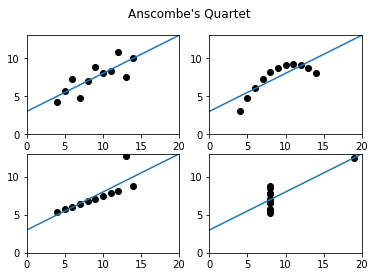

In [726]:
problem2_1()

## Problem 2. {-}

In [727]:
def problem2_2():
    x = np.linspace(0,1,50)
    count=0
    b=[]
    for n in range(4):
        for v in range(n+1):
            plt.subplot(4,4,4*n+1+v)
            b.append(scipy.special.binom(n,v) * (x ** v) * ((1-x) ** (n-v)))
            plt.plot(x, b[count])
            plt.title(r"$(n,v) = $("+str(n)+", "+str(v)+")")
            plt.xticks(np.arange(0, 1+1e-15, step=1))
            plt.yticks(np.arange(0, 1+1e-15, step=1))
            plt.tick_params(axis='both', which='major', labelsize=7)
            count+=1
    plt.axis([0,1,0,1])
    plt.subplots_adjust(hspace=.99, wspace=.4)
    plt.suptitle(r"Bernstein basis polynomials, $\binom{n}{v} x^{v} (1-x)^{n-v}$")
    plt.show()

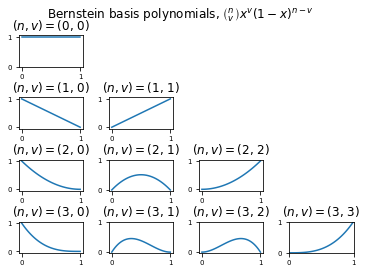

In [728]:
problem2_2()

## Problem 3. {-}

In [729]:
def problem2_3():
    mlb = np.load("MLB.npy")
    height = np.array(mlb.T[0])
    weight = np.array(mlb.T[1])
    age = np.array(mlb.T[2])
    
    plt.subplot(221)
    lm1 = scipy.stats.linregress(height,weight)
    plt.scatter(x=height,y=weight,facecolors="none", edgecolors="k",s=12)
    plt.xlabel("Height (in)", size=13)
    plt.ylabel("Weight (lbs)\nRegressed on\nHeight & Weight", size=13)
    plt.plot(height, lm1[0]*height+lm1[1], color="r")
    
    plt.subplot(222)
    lm2 = scipy.stats.linregress(age,weight)
    plt.scatter(x=age,y=weight,facecolors="none", edgecolors="k",s=12)
    plt.xlabel("Age (yrs)", size=13)
    plt.plot(age, lm2[0]*age+lm2[1], color="r")
    plt.yticks([]," ")
    
    plt.subplot(223)
    plt.hist(weight, bins=15, range=[min(weight),max(weight)+1], color="k")
    plt.xlabel("Weight (lbs)", size=13)
    plt.yticks([]," ")
    plt.ylabel("Distribution of\nWeight & Age", size=13)
    
    plt.subplot(224)
    plt.hist(age, bins=np.arange(20,50), color="k")
    plt.xlabel("Age (yrs)", size=13)
    plt.yticks([]," ")
    
    plt.subplots_adjust(hspace=.5, wspace=.07)
    
    plt.show()

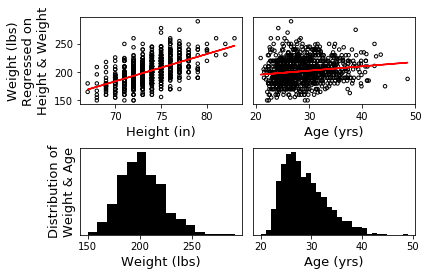

In [730]:
problem2_3()

## Problem 4. {-}

In [739]:
def problem2_4():
    year, mag, long, lat = np.load("earthquakes.npy").T

    fig = plt.figure()
    ax = [fig.add_subplot(221), 
         fig.add_subplot(222),
         fig.add_subplot(223),
         fig.add_subplot(224)]
    
    year_labs = []
    for i in np.arange(2000,2010):
        year_labs.append("'"+str(i)[-2:])
    year_ints = []
    for i in year:
        year_ints.append(int(i))
    year_ixs = []    
    for k in range(2000,2010):
        year_ixs.append(year_ints.index(k))  
    mags = []
    for j in range(len(year_ixs)):
        mags.append([])
        for i in range(len(mag)):
            if j==0:
                if i>year_ixs[j]:
                    mags[j].append(mag[i])
            else:
                if i>year_ixs[j] and i<year_ixs[j-1]:
                    mags[j].append(mag[i])               
    mags_avgs = []
    mags_avgs_labs=[]
    for i in mags:
        mags_avgs.append((sum(i)/len(i))-5)
        mags_avgs_labs.append(str(round(sum(i)/len(i),2)))

        
    ax[0].hist(year, bins=np.arange(2000,2011), color="k")
    ax[0].set_title("Earthquake Frequency \nper Year")
    ax[0].set_xticks(np.arange(2000,2010))
    ax[0].set_xticklabels(year_labs,rotation='vertical')
    
    ax[1].hist(mag, bins=20, range=(5,max(mag)), color="k")
    ax[1].set_title("Earthquake Frequency \nby Magnitude")
    ax[1].set_xticks(np.arange(5,10))
    
    ax[2].plot(long, lat, "r,")
    ax[2].set_xlabel("Longitude")
    ax[2].set_ylabel("Latitude")
    ax[2].set_title("Location of Earthquakes")
    ax[2].set_aspect("equal")

    ax[3].bar(list(range(2000,2010)),mags_avgs,color="r")
    ax[3].set_yticklabels(mags_avgs_labs)
    ax[3].set_xticks(np.arange(2000,2010))
    ax[3].set_xticklabels(year_labs,rotation='vertical')
    ax[3].set_title("Average Magnitude of \nRichter-5+ Earthquakes by Year")
    
    plt.subplots_adjust(hspace=.7, wspace=.3)
    plt.show()



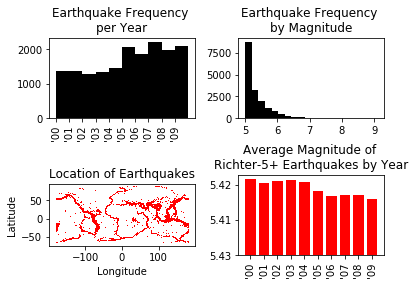

In [740]:
problem2_4()

## Problem 5. {-}

In [741]:
def problem2_5():
    x = np.linspace(-1, 2, 200)
    X,Y = np.meshgrid(x,x)
    Z = (1-X)**2 + 100*(Y-X**2)**2
    
    plt.pcolormesh(X,Y,Z,cmap="inferno")
    plt.colorbar()
    plt.contour(X,Y,Z,[.1,.5,2,8,32,128,1024],colors="w")
    plt.plot(1,1,"r.")
    plt.show()

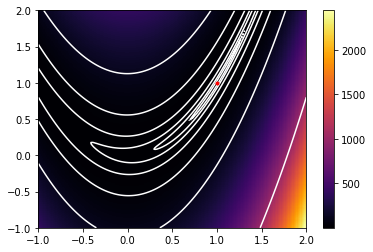

In [742]:
problem2_5()

## Problem 6. {-}

In [747]:
def problem2_6():
    pop, gdp, mh, fh = np.load("countries.npy").T
    countries = ["Austria", "Bolivia", "Brazil", "China",
                "Finland", "Germany", "Hungary", "India",
                "Japan", "North Korea", "Montenegro", "Norway",
                "Peru", "South Korea", "Sri Lanka", "Switzerland",
                "Turkey", "U.K.", "U.S.", "Vietnam"]
    
    fig, ax = plt.subplots(2,2)
    
    h = []
    for i in range(len(mh)):
        h.append((mh[i] + fh[i]) / 2)
    h = np.array(h)
    
    gdp_labs = []    
    for i in range(len(np.arange(min(gdp),max(gdp)+1,1000))):
        if i%3==0 or i==len(np.arange(min(gdp),max(gdp)+1,1000))-1:
            gdp_labs.append(str(int(round(np.arange(min(gdp),max(gdp)+1,1000)[i])/1000))+" T")
        else:
            gdp_labs.append("")
                
    ax[0,0].bar(countries, gdp, color="b")
    ax[0,0].set_yticks(np.arange(min(gdp),max(gdp)+1,1000))
    ax[0,0].set_yticklabels(gdp_labs,fontsize=8)
    ax[0,0].set_xticks(countries)
    ax[0,0].set_xticklabels(countries,fontsize=7,rotation=90)
    ax[0,0].set_title("GDP by country (USD)")
    
    gdppc = []
    for i in range(len(gdp)):
        gdppc.append(gdp[i] / pop[i])
    gdppc=np.array(gdppc)
        
    ax[0,1].scatter(gdppc, h, color="b")
    lm = scipy.stats.linregress(gdppc, h)
    ax[0,1].plot(gdppc, lm[0]*gdppc+lm[1],"m")
    ax[0,1].set_xticks([0,25,50,75])
    ax[0,1].set_xticklabels(["0", "25 K", "50 K", "75 K"])
    ax[0,1].set_title("Avgerage height (cm) regressed \non GDP per capita (USD)")
    
    ax[1,0].hist(np.sort(pop)[:-2],bins=np.arange(0,np.sort(pop)[-3]+21,20),color="m")
    ax[1,0].set_title("Population (China, India removed)",size=9)
    ax[1,0].set_ylabel("Frequency")
    ax[1,0].set_yticks([0,2,4,6,8])
    ax[1,0].set_xticks(np.arange(0,301,100))
    ax[1,0].set_xticklabels(["0 M", "100 M", "200 M", "300 M"])
    
    ax[1,1].hist(gdppc,bins=np.arange(0,100,10),color="b")
    ax[1,1].set_title("GDP per capita")
    ax[1,1].set_ylabel("Frequency")
    ax[1,1].set_yticks(np.arange(0,11,2))
    ax[1,1].set_xticks([0,25,50,75])
    ax[1,1].set_xticklabels(["0", "25 K", "50 K", "75 K"])

    plt.subplots_adjust(hspace=.9, wspace=.3)
    plt.show()

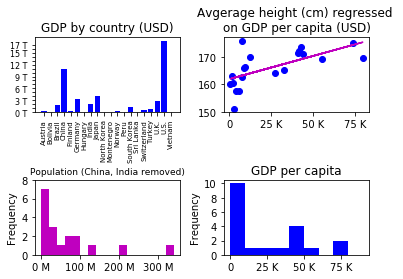

In [748]:
problem2_6()

# Pandas 1 

In [749]:
import pandas as pd
import numpy as np

## Problem 1. {-}

In [750]:
def problem3_1():
    s = pd.Series(np.array(range(0,51,2))**2+1, index = range(0,51,2))

    s[np.array([  i % 3 == 0    for i in range(len(s.index))  ])] = 0

    return s

In [751]:
print(problem3_1())

0        0
2        5
4       17
6        0
8       65
10     101
12       0
14     197
16     257
18       0
20     401
22     485
24       0
26     677
28     785
30       0
32    1025
34    1157
36       0
38    1445
40    1601
42       0
44    1937
46    2117
48       0
50    2501
dtype: int64


## Problem 2. {-}

In [752]:
def problem3_2(p, d=100):
    dates = pd.date_range("1/1/2000","12/31/2000",freq="D")
    values = [d]
    for i in range(1,len(dates)):
        new = values[i-1]
        shock = np.random.binomial(1,p)
        if shock == 1:
            new += 1
        elif shock == 0:
            new -= 1
        values.append(new)    
    time_series = pd.Series(values, index=dates)
    time_series[np.array([  i < 0    for i in range(len(time_series.index))  ])] = 0
    time_series.plot()

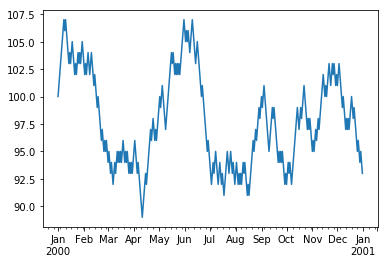

In [753]:
problem3_2(.5)

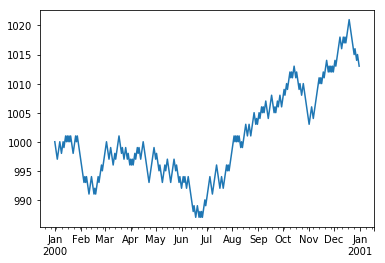

In [754]:
problem3_2(.5, d=1_000)

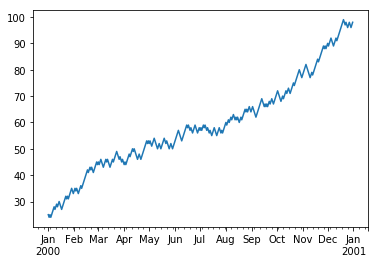

In [755]:
problem3_2(.6, d=25)

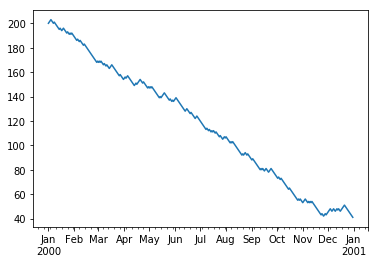

In [756]:
problem3_2(.25, d=200)

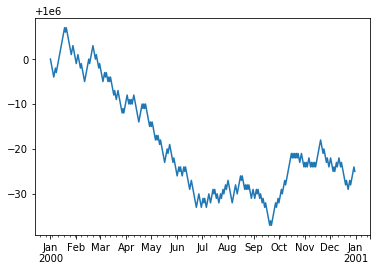

In [757]:
problem3_2(.51, d=1_000_000)

## Problem 3. {-}

In [758]:
#build toy data for SQL operations
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 
        'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 
                    'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 
                          'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd,
                         'Math_Major': major})

In [759]:
def problem3_3():
    # SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = "M"
    return studentInfo[(studentInfo['Age']>19) & 
            (studentInfo['Sex']=='M')][['ID','Name']]

In [760]:
print(problem3_3())

   ID   Name
0   0  Mylan
6   6   Matt


## Problem 4. {-}

In [761]:
def problem3_4():
    return pd.merge(studentInfo, otherInfo)[studentInfo['Sex']=='M'][['ID','Age','GPA']]

In [762]:
print(problem3_4())

   ID  Age  GPA
0   0   20  3.8
2   2   18  3.0
4   4   19  2.8
6   6   20  3.8
7   7   19  3.4


## Problem 5. {-}

In [763]:
def problem3_5():
    df = pd.read_csv('crime_data.csv', index_col='Year')
    df.dropna()
    df['Crime Rate'] = df['Total']/df['Population']
    
    plt.plot(df.index, df['Crime Rate'])
    plt.title("Crime rate over time")
    plt.xlabel("Year")
    plt.ylabel("Crime Rate")
    plt.show()
    
    print(
        "*  The top 5 highest-crime years on record are:\n\t"+
        str(np.flip(np.array(df.sort_values(by='Crime Rate').index[-5:]),0))
    )
    
    print(
        "*  Average number of total crimes, 1960-2012: "+
        str(int(round(df[(df.index>=1960) & (df.index<=2012)]['Total'].sum()/(2012-1960+1)))) +
        "\n*  Average number of burglaries, 1960-2012: "+
        str(int(round(df[(df.index>=1960) & (df.index<=2012)]['Burglary'].sum()/(2012-1960+1))))
    )
    
    avg_tot = df[(df.index>=1960) & (df.index<=2012)]['Total'].sum()/(2012-1960+1)
    avg_bur = df[(df.index>=1960) & (df.index<=2012)]['Burglary'].sum()/(2012-1960+1)
    
    print(
        "*  Years where the number of crimes was below average but the "+
        "number of burglaries was above average:\n\t"+
        str(np.array(df[(df['Total'] < avg_tot) & (df['Burglary'] > avg_bur)].index))
    )
    
    plt.plot(df['Population'], df['Murder'])
    plt.title("Murders as a function of population")
    plt.xlabel("Population")
    plt.ylabel("Murders")
    plt.show()
    
    df2 = df[df.index.isin(range(1980,1990))][['Population','Violent','Robbery']]
    
    return df2

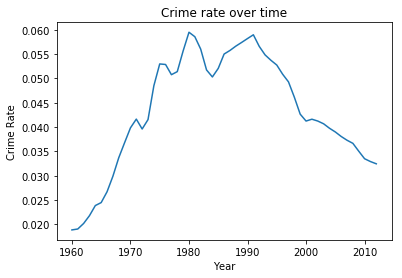

*  The top 5 highest-crime years on record are:
	[1980 1991 1981 1990 1989]
*  Average number of total crimes, 1960-2012: 10638068
*  Average number of burglaries, 1960-2012: 2446286
*  Years where the number of crimes was below average but the number of burglaries was above average:
	[1973 1974]


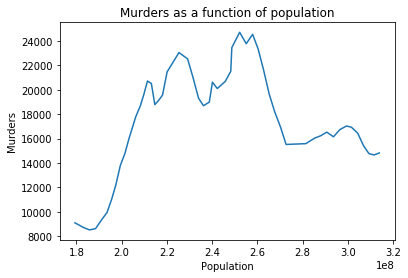

In [764]:
df2 = problem3_5()
df2.to_csv("crime_subset.csv")

## Problem 6. {-}

In [765]:
def problem3_6_1():
    df = pd.read_csv('titanic.csv')
    df = df.drop(columns=['Sibsp','Parch','Cabin','Boat','Body','home.dest'])
    df = df[df['Survived'].isna() == False]
    df['Survived'] = df['Survived'] == 1.0
    df['Age'] = df['Age'].fillna(df['Age'].sum()/df.shape[0])
    return df

In [766]:
titanic_clean = problem3_6_1()
titanic_clean.to_csv('titanic_clean.csv')

In [767]:
def problem3_6_2():
    df = pd.read_csv('titanic_clean.csv')
    
    print(
        '*  '+
        str(int(df['Survived'].sum()))+
        ' people survived, which comprises '+
        str(100*round(df['Survived'].sum()/df.shape[0],3))+
        '% of the passengers.'
        
        '\n*  The average price of a ticket was $'+
        str(round(df['Fare'].sum()/df.shape[0],2))+
        ', and the most expensive ticket was $'+
        str(round(df['Fare'].max(),2))+
        
        '.\n*  The oldest survivor was '+
        str(int(df[df['Survived']==True]['Age'].max()))+
        ', and the youngest survivor was '+
        str(round(df[df['Survived']==True]['Age'].min(),2))+
        '.\n*  The oldest non-survivor was '+
        str(int(df[df['Survived']==False]['Age'].max()))+
        ', and the youngest non-survivor was '+
        str(round(df[df['Survived']==False]['Age'].min(),2))+
        '.'
    )
    

In [768]:
problem3_6_2()

*  500 people survived, which comprises 38.2% of the passengers.
*  The average price of a ticket was $33.27, and the most expensive ticket was $512.33.
*  The oldest survivor was 80, and the youngest survivor was 0.17.
*  The oldest non-survivor was 74, and the youngest non-survivor was 0.33.


# Pandas 2

## Problem 1. {-}

In [769]:
!pip install pydataset

In [770]:
from pydataset import data
from scipy import stats

In [907]:
def problem4_1():
    mfb = data("Arbuthnot")
    road = data("road")
    bdr = data("birthdeathrates")
    bwt = data("birthwt")
    lung = data("lung")
    
    ###############
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].plot(list(mfb['Year']), list(mfb['Ratio']), color="k")
    ax[0].set_title('London M/F birth\nratio, 1629-1710')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Ratio')
        
    ln1 = ax[1].plot(list(mfb['Year']), list(mfb['Mortality']), color="k",label='Mortality (LHS)')
    ax2 = ax[1].twinx()
    ln2 = ax2.plot(list(mfb['Year']), list(mfb['Plague']), "r:",label='Plague (RHS)')

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=1)
    
    ax[1].set_yticks(range(0,120000,20000))
    ax[1].set_title('London mortality and\nplague deaths, 1629-1710')
    ax[1].set_xlabel('Year')

    plt.subplots_adjust(hspace=.9, wspace=.4)
    plt.show()
    
    ###############
    
    fig, ax = plt.subplots(1,2)

    ax[0].bar(list(road.index), list(road['deaths']), color="k")
    ax[0].set_title('U.S. road accident\ndeaths by state')
    ax[0].set_xticklabels(list(road.index), rotation=90, size=6)
    ax[0].set_ylabel('Deaths')
    
    road = road[road['deaths']<4000]
    ax[1].scatter(road['temp'],road['deaths'],color='k')
    m,b,r,p,se = scipy.stats.linregress(road['temp'],road['deaths'])
    ax[1].plot(road['temp'],road['temp']*m+b,'r--')
    ax[1].set_title('U.S. road deaths regressed\non air temperature (F)')
    ax[1].set_ylabel('Deaths')
    ax[1].set_xlabel('Temperature (F)')

    plt.subplots_adjust(hspace=.9, wspace=.4)
    plt.show()
    
    ###############

    fig, ax = plt.subplots(1,2)

    ax[0].scatter(list(bdr['birth']), list(bdr['death']), color="k")
    ax[0].set_title('Death rates regressed\non birth rates')
    ax[0].set_ylabel('Death rate')
    ax[0].set_xlabel('Birth rate')
    m,b,r,p,se = scipy.stats.linregress(bdr['birth'],bdr['death'])
    ax[0].plot(bdr['birth'],bdr['birth']*m+b,'r--')
    
    ax[1].hist(bdr['birth'], color="k")
    ax[1].set_title('Histogram of\nbirth rates')
    ax[1].set_xlabel('Birth rate')

    plt.subplots_adjust(hspace=.9, wspace=.4)
    plt.show()
    
    ###############
    
    fig, ax = plt.subplots(1,2)

    ax[0].scatter(list(bwt['age']), list(bwt['bwt']), color="k")
    ax[0].set_title('Age of mother regressed\non infant birth weight')
    ax[0].set_ylabel('Birth weight (g)')
    ax[0].set_xlabel('Age of mother (yrs)')
    m,b,r,p,se = scipy.stats.linregress(bwt['age'],bwt['bwt'])
    ax[0].plot(bwt['age'],bwt['age']*m+b,'r--')
    
    ax[1].plot(list(bwt['race']), list(bwt['bwt']), "kx")
    ax[1].plot(1.0,bwt[bwt['race']==1.0]['bwt'].sum()/bwt[bwt['race']==1.0].shape[0],"rD")
    ax[1].plot(2.0,bwt[bwt['race']==2.0]['bwt'].sum()/bwt[bwt['race']==2.0].shape[0],"rD")
    ax[1].plot(3.0,bwt[bwt['race']==3.0]['bwt'].sum()/bwt[bwt['race']==3.0].shape[0],"rD")
    ax[1].set_ylabel('Birth weight (g)')
    ax[1].set_xticks([1.0,2.0,3.0])
    ax[1].set_xticklabels(['White','Black','Other'])
    ax[1].set_xlabel('Race')
    ax[1].set_title('Mean birth weight by race')

    plt.subplots_adjust(hspace=.9, wspace=.4)
    plt.show()
    
    ###############
    
    fig, ax = plt.subplots(1,2)
    
    lung = lung[(~lung['ph.karno'].isna()) & (~lung['time'].isna()) & 
               (~lung['meal.cal'].isna()) & (~lung['wt.loss'].isna())]
    
    ax[0].scatter(list(lung['ph.karno']), list(lung['time']), color="k")
    ax[0].set_title('Time of survival regressed\non physician Karnofsky score')
    ax[0].set_ylabel('Survival time (days)')
    ax[0].set_xlabel('Karnofsky performance score')
    m,b,r,p,se = scipy.stats.linregress(lung['ph.karno'],lung['time'])
    ax[0].plot(lung['ph.karno'],lung['ph.karno']*m+b,'r--')
    
    ax[1].scatter(list(lung['meal.cal']), list(lung['wt.loss']), color="k")
    ax[1].set_title('Weight loss regressed\non calories consumed')
    ax[1].set_ylabel('Weight loss in last 6 months')
    ax[1].set_xlabel('Calories consumed at meals')
    m,b,r,p,se = scipy.stats.linregress(lung['meal.cal'],lung['wt.loss'])
    ax[1].plot(lung['meal.cal'],lung['meal.cal']*m+b,'r--')

    plt.subplots_adjust(hspace=.9, wspace=.4)
    plt.show()

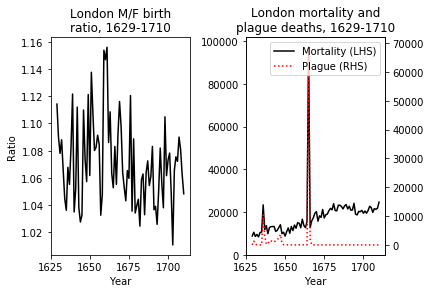

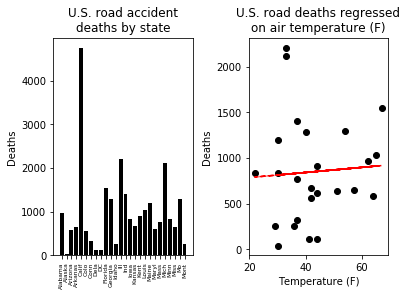

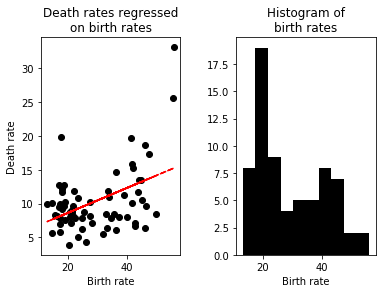

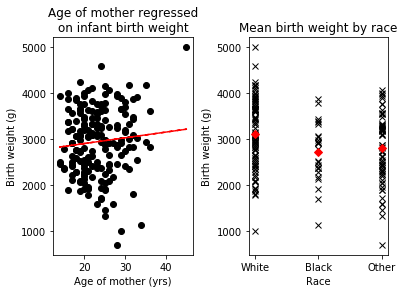

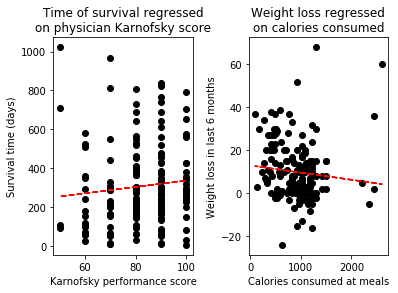

In [908]:
problem4_1()

# Pandas 3

## Problem 1. {-}

In [1121]:
def problem5_1():
    iris = data("iris")
    pois = data("poisons")
    diam = data("diamonds")
            
    ###############
    
    iris.boxplot(['Sepal.Length',
                            'Sepal.Width',
                            'Petal.Length',
                            'Petal.Width'], by='Species', grid=False)
    plt.suptitle("")
    plt.subplots_adjust(hspace=.3, wspace=.2)
    plt.show()
    print('''
        (1) We can see from the box plots above that the setosa species
            is likely the most easily distringuishable from the others, 
            because the petal length and petal width both entirely lie outside
            the extent of the petal length and width distributions of the other 
            two species in the sample.
            
        (2) If I have iris data without a species label, I would
            probably run a multiple regression of a Species categorical variable
            on the other four variables for my currently existing data set, 
            and then use that regression to form confidence intervals for 
            any out-of-samaple data points.
        ''')
    
    print('---------------------------')###############
    
    pois.boxplot('time', by='poison', grid=False)
    plt.title('')
    plt.xlabel('Poison type')
    plt.ylabel('Survival time (out of 10 hrs)')
    pois.boxplot('time', by='treat', grid=False)
    plt.title('')
    plt.xlabel('Treatment type')
    plt.ylabel('Survival time (out of 10 hrs)')
    
    pois[pois['poison']==1].boxplot('time', by='treat', grid=False)
    plt.title('Treatment survival times for Poison 1')
    plt.suptitle('')
    plt.xlabel('Treatment type')
    plt.ylabel('Survival time (out of 10 hrs)')
    
    pois[pois['poison']==2].boxplot('time', by='treat', grid=False)
    plt.title('Treatment survival times for Poison 2')
    plt.suptitle('')
    plt.xlabel('Treatment type')
    plt.ylabel('Survival time (out of 10 hrs)')
    
    pois[pois['poison']==3].boxplot('time', by='treat', grid=False)
    plt.title('Treatment survival times for Poison 3')
    plt.suptitle('')
    plt.xlabel('Treatment type')
    plt.ylabel('Survival time (out of 10 hrs)')
    
    plt.show()
    
    print('''
        (1) Poison 3 is very likely the most deadly, since its time of survival is 
            noticeably and significantly lower than for the other two poison types.
            
            The most effective treatment is probably treatment "B" because its 
            associated time of survival is noticeably higher than for any other 
            treatment type.
    
        (2) If I didn't know what poison it was, I would choose treatment "B" because, 
            overall, it has the highest time of survival. But, if I did know what kind of 
            poison it was, then I would make the following choices:
            
            *    Poison 1 ==> Treatment B
            *    Poison 2 ==> Treatment B
            *    Poison 3 ==> Treatment B
            
            It looks like treatment B is just all-around the best!
        ''')
    
    print('---------------------------')###############
    
    diam.boxplot('price', by='color', grid=False)
    plt.suptitle('')
    diam.boxplot('price', by='cut', grid=False)
    plt.suptitle('')
    
    clarity_level = []
    for i in diam['clarity']:
        clarity_level.append(["I1", "SI1", "SI2", "VS1", "VS2", "VVS1", "VVS2", "IF"].index(i)+1)
    diam['clarity_level'] = clarity_level
    
    color_level = []
    for i in diam['color']:
        color_level.append(["J","I","H","G","F","E","D"].index(i)+1)
    diam['color_level'] = color_level
    
    diam.boxplot('carat', by='cut', grid=False)
    plt.suptitle('')
    diam.boxplot('clarity_level', by='cut', grid=False)
    plt.suptitle('')
    diam.boxplot('color_level', by='cut', grid=False)
    plt.suptitle('')
    plt.show()
    
    print('''
        (1) The color of the diamond seems to have a noticeably influential role
            in determining the price of the diamond. Particularly, diamonds of
            colors "lower down in the alphabet" (like H,I,J) are associated with 
            higher prices, on average. 
            
            The cut of the diamond has less clear of an impacton price, but it does
            appear that Premium diamonds have noticeably higher prices than average,
            and Ideal Cut diamonds have noticeably lower prices.
        
        (2) Although Fair diamonds have a low clarity, they represent higher-carat diamonds 
            in this data set, so they reflect higher prices. Also, ideal cuts have a
            slighly lower-quality median color (according to how the colors were described 
            in the documentation), as compared with fair cuts.
        ''')

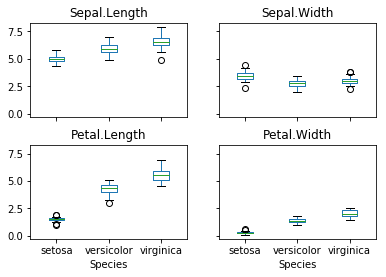


        (1) We can see from the box plots above that the setosa species
            is likely the most easily distringuishable from the others, 
            because the petal length and petal width both entirely lie outside
            the extent of the petal length and width distributions of the other 
            two species in the sample.
            
        (2) If I have iris data without a species label, I would
            probably run a multiple regression of a Species categorical variable
            on the other four variables for my currently existing data set, 
            and then use that regression to form confidence intervals for 
            any out-of-samaple data points.
        
---------------------------


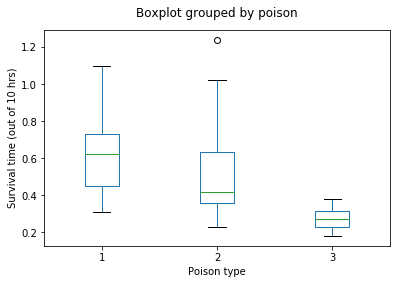

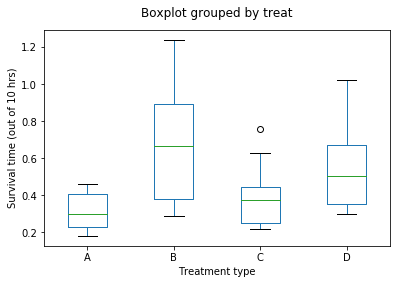

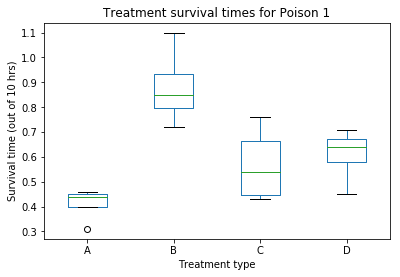

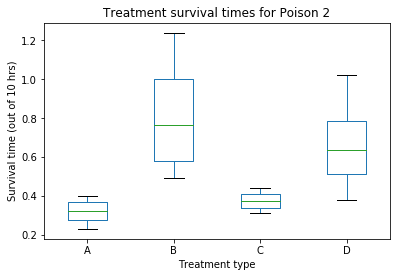

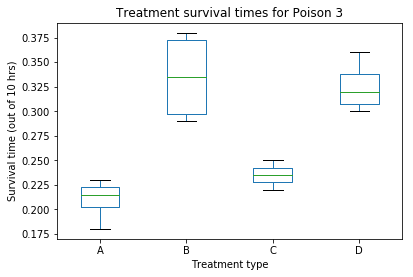


        (1) Poison 3 is very likely the most deadly, since its time of survival is 
            noticeably and significantly lower than for the other two poison types.
            
            The most effective treatment is probably treatment "B" because its 
            associated time of survival is noticeably higher than for any other 
            treatment type.
    
        (2) If I didn't know what poison it was, I would choose treatment "B" because, 
            overall, it has the highest time of survival. But, if I did know what kind of 
            poison it was, then I would make the following choices:
            
            *    Poison 1 ==> Treatment B
            *    Poison 2 ==> Treatment B
            *    Poison 3 ==> Treatment B
            
            It looks like treatment B is just all-around the best!
        
---------------------------


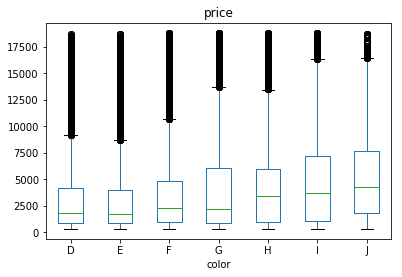

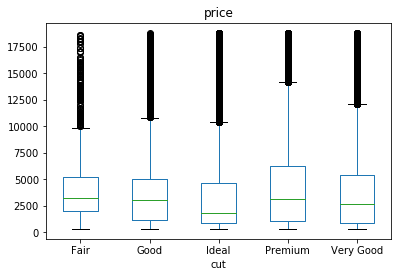

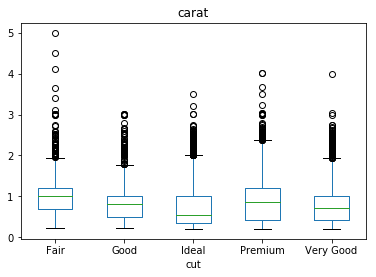

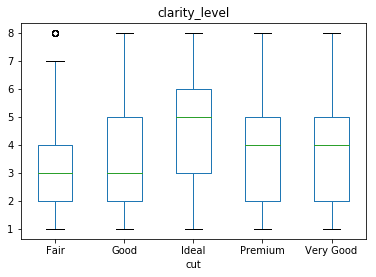

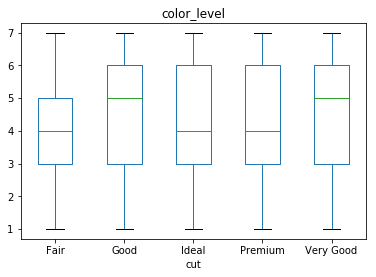


        (1) The color of the diamond seems to have a noticeably influential role
            in determining the price of the diamond. Particularly, diamonds of
            colors "lower down in the alphabet" (like H,I,J) are associated with 
            higher prices, on average. 
            
            The cut of the diamond has less clear of an impacton price, but it does
            appear that Premium diamonds have noticeably higher prices than average,
            and Ideal Cut diamonds have noticeably lower prices.
        
        (2) Although Fair diamonds have a low clarity, they represent higher-carat diamonds 
            in this data set, so they reflect higher prices. Also, ideal cuts have a
            slighly lower-quality median color (according to how the colors were described 
            in the documentation), as compared with fair cuts.
        


In [1122]:
problem5_1()

## Problem 2. {-}

In [1101]:
def problem5_2():
    df = pd.read_csv('titanic_clean.csv')
    
    print(df.head())

    survived_bin = []
    for i in df['Survived']:
        if i: survived_bin.append(1.)
        else: survived_bin.append(0.)
    df['Survived'] = survived_bin
    
    df['Age'] = pd.cut(df['Age'], [0,12,18,40,80,100])
    
    print(
        "(1)\n",
        df.pivot_table(values="Survived", index="Embarked", aggfunc = "mean"),"\n\n(2)\n",
        df.pivot_table(values="Survived", index="Embarked", columns="Sex", aggfunc = "mean"),
        '''
        \n(3)
These tables suggest that the place where peple embarked probably doesn't make
that much of a difference on survival outcome, whereas sex seems to make much
larger of an impact. This is especially clear given the context of the problem:
If a ship is sinking, the place where you embark does not have any influence
on your likelihood of survival. It makes sense that more females survived, given
that women were given priority for the lifeboats, and the RMS Titanic infamously
had much too few lifeboats.\n\n(4)
        ''',
        df.pivot_table(values="Survived", index="Embarked", columns="Pclass", aggfunc = ["mean","count"]),"\n\n",
        df.pivot_table(values="Survived", index="Embarked", columns=["Pclass","Sex"], aggfunc = "mean"),"\n\n",
        df.pivot_table(values="Survived", index="Embarked", columns="Age", aggfunc = ["mean","count"]),"\n\n",
        df.pivot_table(values="Survived", index="Embarked", columns=["Age","Sex"], aggfunc = "mean"),
        '''\n
Interestingly, it looks like the trend of the "C" embarkers surviving more than
the "Q" and "S" embarkers appears to persist throughout each cross-section of 
sex, class, and age. I was not sure why this was, but after disaggregating it
a bit more, I noticed that "C" embarkers had a larger proportion of women than "Q"
and "S" embarkers across the aforementioned cross-sections that I analyzed, so
it is likely an issue of colinearity that is erroneously suggesting that "C" embarkers
survived on a better rate merely because they embarked at "C".
        '''
    )
    
    

In [1102]:
problem5_2()

   Unnamed: 0  Pclass  Survived  \
0           0     1.0      True   
1           1     1.0      True   
2           2     1.0     False   
3           3     1.0     False   
4           4     1.0     False   

                                              Name     Sex      Age  Ticket  \
0                    Allen, Miss. Elisabeth Walton  female  29.0000   24160   
1                   Allison, Master. Hudson Trevor    male   0.9167  113781   
2                     Allison, Miss. Helen Loraine  female   2.0000  113781   
3             Allison, Mr. Hudson Joshua Creighton    male  30.0000  113781   
4  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0000  113781   

       Fare Embarked  
0  211.3375        S  
1  151.5500        S  
2  151.5500        S  
3  151.5500        S  
4  151.5500        S  
(1)
           Survived
Embarked          
C         0.555556
Q         0.357724
S         0.332604 

(2)
 Sex         female      male
Embarked                    
C         0

## Problem 3. {-}

In [1254]:
def problem5_3():
    npk = data("npk")

    print("\n",
        "*  average for N:",round(npk[npk['N']==1]['yield'].mean(),2),"\n",
        "*  average for P:",round(npk[npk['P']==1]['yield'].mean(),2),"\n",
        "*  average for K:",round(npk[npk['K']==1]['yield'].mean(),2),"\n")
    print("(1) The most effective at stimulating growth is N. The least effectve is K.\n")
    
    print(npk.pivot_table(values="yield", index=["N","P","K"], aggfunc = "mean"))
    print("\n(2) The optimal combination is {N}. The worst combination is {P,K}.\n")

    swiss = data("swiss")
    
    m,b,r,p,se = scipy.stats.linregress(swiss['Infant.Mortality'],swiss['Fertility'])
    plt.scatter(swiss['Infant.Mortality'],swiss['Fertility'],color="k")
    plt.plot(swiss['Infant.Mortality'],m*swiss['Infant.Mortality']+b,"r:")
    plt.xlabel("Infant Mortality")
    plt.ylabel("Fertility")
    plt.show()
    
    print("\n(1) High fertility is roughly linearly associated with high infant mortality.\n")
    
    swiss['Catholic_Status'] = pd.cut(swiss['Catholic'],[0,50,100])
    
    swiss.boxplot(['Fertility','Agriculture','Examination','Education','Infant.Mortality'], 
                  by='Catholic_Status', grid=False)
    plt.suptitle("")
    plt.subplots_adjust(hspace=.4, wspace=.1)
    plt.show()
    
    print("\n(2) Provinces with a Catholic dominance  have relatively higher fertility and agriculture,"+ 
          "lower examination and education, and slighlty lower infant mortality. \n")
    
    r2_ag = round(scipy.stats.linregress(swiss['Agriculture'],swiss['Fertility'])[2]**2,2)
    r2_ex = round(scipy.stats.linregress(swiss['Examination'],swiss['Fertility'])[2]**2,2)
    r2_ed = round(scipy.stats.linregress(swiss['Education'],swiss['Fertility'])[2]**2,2)
    r2_ca = round(scipy.stats.linregress(swiss['Catholic'],swiss['Fertility'])[2]**2,2)
    r2_im = round(scipy.stats.linregress(swiss['Infant.Mortality'],swiss['Fertility'])[2]**2,2)
    
    p_ag = round(scipy.stats.linregress(swiss['Agriculture'],swiss['Fertility'])[3],5)
    p_ex = round(scipy.stats.linregress(swiss['Examination'],swiss['Fertility'])[3],5)
    p_ed = round(scipy.stats.linregress(swiss['Education'],swiss['Fertility'])[3],5)
    p_ca = round(scipy.stats.linregress(swiss['Catholic'],swiss['Fertility'])[3],5)
    p_im = round(scipy.stats.linregress(swiss['Infant.Mortality'],swiss['Fertility'])[3],5)
    
    print("R^2 and P values for Fertility single-regressed on the following variables:\n",
          "Agriculture R^2:",r2_ag,", P:",p_ag,"\n",
          "Examination R^2:",r2_ex,", P:",p_ex,"\n",
          "Education R^2:",r2_ed,", P:",p_ed,"\n",
          "Catholic R^2:",r2_ca,", P:",p_ca,"\n",
          "Infant Mortality R^2:",r2_im,", P:",p_im
         )
    
    print("\n(3) The most important factors are Education and Examination, since they have the highest R^2"+ 
          "and lowest P-values among all the single-regressions of fertility.\n")
    
    df = pd.read_csv('filmdeathcounts.csv')

    print("Hypothesis 1: Films that are rated more restricted ratings by the MPAA are associated"+ 
          "with larger death counts")
    print("\n--> TEST:")
    ratings = list(set(df['MPAA_Rating']))
    plt.plot(df['MPAA_Rating'], df['Body_Count'],"kx")
    plt.hlines(df['Body_Count'].mean(),xmin=0,xmax=10,color="r",linestyles="dashed")
    for i in ratings:
        plt.plot(i,df[df['MPAA_Rating']==i]['Body_Count'].mean(),"rD")
    plt.show()
    print("\nI am wrong. It appears that 'G'-rated movies and 'PG-13' movies have more deaths on"+ 
          "average than 'R' movies.\n")
    print("---------")
    print("Hypothesis 2: Films have been getting more violent over time (i.e., more death counts)")
    print("\n--> TEST:")
    plt.scatter(df['Year'],df['Body_Count'],facecolors="none", edgecolors="k",s=14)
    m,b,r,p,se=scipy.stats.linregress(df['Year'],df['Body_Count'])
    plt.plot(df['Year'],df['Year']*m+b,"r--")
    plt.show()
    print("\nThis appears not to be the case. On average, movies have been declining in death "+
          "count, although the variance has noticeably increased over time.\n")


 *  average for N: 57.68 
 *  average for P: 54.28 
 *  average for K: 52.88 

(1) The most effective at stimulating growth is N. The least effectve is K.

           yield
N P K           
0 0 0  51.433333
    1  52.000000
  1 0  54.333333
    1  50.500000
1 0 0  63.766667
    1  54.666667
  1 0  57.933333
    1  54.366667

(2) The optimal combination is {N}. The worst combination is {P,K}.



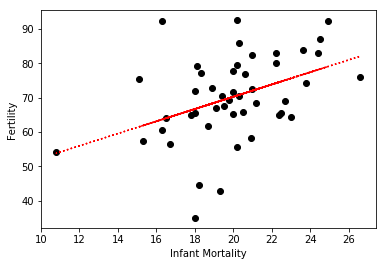


(1) High fertility is roughly linearly associated with high infant mortality.



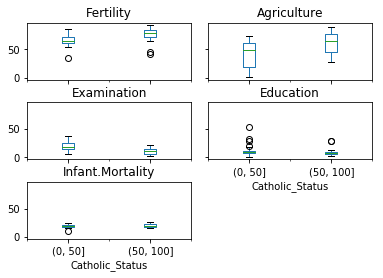


(2) Provinces with a Catholic dominance  have relatively higher fertility and agriculture,lower examination and education, and slighlty lower infant mortality. 

R^2 and P values for Fertility single-regressed on the following variables:
 Agriculture R^2: 0.12 , P: 0.01492 
 Examination R^2: 0.42 , P: 0.0 
 Education R^2: 0.44 , P: 0.0 
 Catholic R^2: 0.22 , P: 0.00103 
 Infant Mortality R^2: 0.17 , P: 0.00359

(3) The most important factors are Education and Examination, since they have the highest R^2and lowest P-values among all the single-regressions of fertility.

Hypothesis 1: Films that are rated more restricted ratings by the MPAA are associatedwith larger death counts

--> TEST:


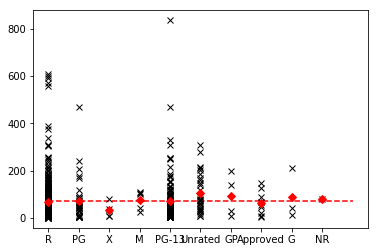


I am wrong. It appears that 'G'-rated movies and 'PG-13' movies have more deaths onaverage than 'R' movies.

---------
Hypothesis 2: Films have been getting more violent over time (i.e., more death counts)

--> TEST:


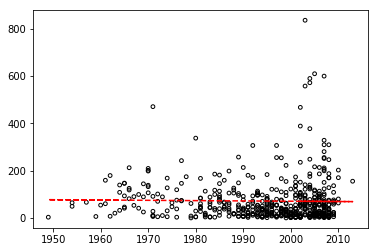


This appears not to be the case. On average, movies have been declining in death count, although the variance has noticeably increased over time.



In [1255]:
problem5_3()

# Pandas 4

## Problem 1. {-}

In [1349]:
def problem6_1():
    df = pd.read_csv('DJIA.csv').dropna()
    df = df[df['VALUE']!="."]
    value = list(df['VALUE'])
    dates = list(df['DATE'])
    
    for i,v in enumerate(value):
        value[i] = float(v)
    index = pd.to_datetime(dates, format="%Y-%m-%d")
    
    djia = pd.Series(value, index=index)
    djia.plot(lw=.5,color="k",title="DJIA, 2006-2016")

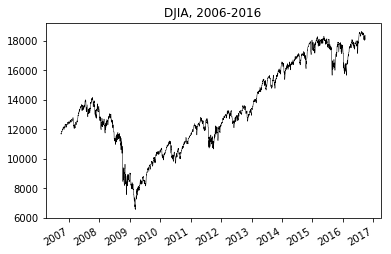

In [1350]:
problem6_1()

## Problem 2. {-}

In [1392]:
def problem6_2():
    df = pd.read_csv("paychecks.csv",header=None)
    date_range = pd.date_range(start="03/13/2008",periods=50, freq="WOM-3FRI").union(
                 pd.date_range(start="03/13/2008",periods=50, freq="WOM-1FRI"))[:-7]
    paychecks = pd.Series(list(df[0]),index=date_range)
    paychecks.plot(title="Paychecks over time")
    

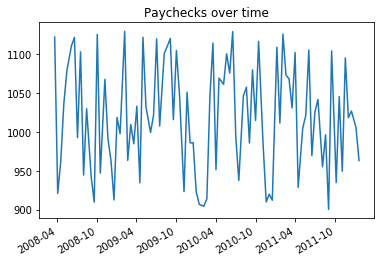

In [1393]:
problem6_2()

## Problem 3. {-}

In [1467]:
def problem6_3():
    df = pd.read_csv("finances.csv")
    p = pd.period_range("1978-08","2018-06",freq="Q-AUG")[:df.shape[0]]
    earn = pd.Series(list(df['EARNINGS']),index=p)
    exp  = pd.Series(list(df['EXPENSES']),index=p)    
    earn.plot(label="Earnings")
    exp.plot(title="Earnings and Expenses (USD) since 1978 Q4",label="Expenses")
    plt.legend()
    plt.show()

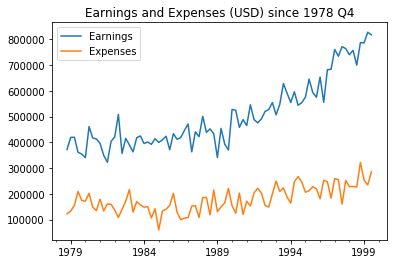

In [1468]:
problem6_3()

## Problem 4. {-}

In [1710]:
def problem6_4():
    df = pd.read_csv("website_traffic.csv")

    df['ENTER'] = pd.to_datetime((df['ENTER']))
    df['LEAVE'] = pd.to_datetime((df['LEAVE']))
    df['DURATION'] = df['LEAVE'] - df['ENTER']
    
    
    duration = list(df['DURATION'])
    seconds = []
    for i in range(len(duration)):
        seconds.append(duration[i]/np.timedelta64(1, 's'))
    
    enter = list(df['ENTER'])
    df2 = pd.Series(seconds, enter)
    
    hours = df2.resample("H")
    hmean = hours.mean()
    
    mins = df2.resample("min")
    mmean = mins.mean()
    
    plt.plot(list(mmean.index), list(mmean),label="Minute")
    plt.plot(list(hmean.index), list(hmean),label="Hour",linewidth=5)

    plt.title("Average duration every hour and minute")
    plt.legend()
    plt.show()

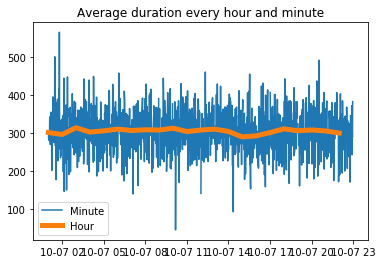

In [1711]:
problem6_4()

## Problem 5. {-}

In [1590]:
def problem6_5():
    df = pd.read_csv('DJIA.csv').dropna()
    df = df[df['VALUE']!="."]
    value = list(df['VALUE'])
    dates = list(df['DATE'])
    
    for i,v in enumerate(value):
        value[i] = float(v)
    index = pd.to_datetime(dates, format="%Y-%m-%d")
    
    djia = pd.Series(value, index=index)
    
    print("Day with largest gain:",str((djia - djia.shift(1)).idxmax())[:-9])
    print("Day with largest loss:",str((djia - djia.shift(1)).idxmin())[:-9])
    
    djia2 = pd.DataFrame(dict(VALUE=value), index = pd.date_range(dates[0],periods=df.shape[0],freq="D"))
    djiaMdiff = djia2 - djia2.shift(freq="M")
    djiaMdiff = djiaMdiff.dropna()
    
    print("Month with the largest gain:",str(djiaMdiff.idxmax())[8:-22])
    print("Month with the largest loss:",str(djiaMdiff.idxmin())[8:-22])

In [1591]:
problem6_5()

Day with largest gain: 2008-10-13
Day with largest loss: 2008-09-29
Month with the largest gain: 2012-12-31
Month with the largest loss: 2008-02-29


## Problem 6. {-}

In [1764]:
def problem6_6():

    df = pd.read_csv('DJIA.csv').dropna()
    df = df[df['VALUE']!="."]
    value = list(df['VALUE'])
    dates = list(df['DATE'])
    for i,v in enumerate(value):
        value[i] = float(v)
    index = pd.to_datetime(dates, format="%Y-%m-%d")
    djia = pd.Series(value, index=index)
    
    djia.plot(lw=.5,color="k",title="DJIA, 2006-2016")
    plt.show()
    
    windows = [30, 120, 365]
    
    for j in [0,1,2]:
    
        ax1 = plt.subplot(221)
        djia.plot(color="gray", lw=.3, ax=ax1)
        djia.rolling(window=windows[j]).mean().plot(color='r', lw=1, ax=ax1)
        ax1.legend(["Actual", "Rolling"], loc="lower right")
        ax1.set_title("Rolling Average")
        ax1.set_xticklabels(labels=range(2007,2018),size=7)

        ax2 = plt.subplot(222)
        djia.plot(color="gray", lw=.3, ax=ax2)
        djia.ewm(span=windows[j]).mean().plot(color='g', lw=1, ax=ax2)
        ax2.legend(["Actual", "EWMA"], loc="lower right")
        ax2.set_title("EWMA")
        ax2.set_xticklabels(labels=range(2007,2018),size=7)

        ax3 = plt.subplot(223)
        djia.plot(color="gray", lw=.3, ax=ax3)
        djia.rolling(window=windows[0]).min().plot(color='m', lw=1, ax=ax3)
        ax3.legend(["Actual", "Min Rolling"], loc="lower right")
        ax3.set_title("Min Rolling Average")
        ax3.set_xticklabels(labels=range(2007,2018),size=7)

        ax4 = plt.subplot(224)
        djia.plot(color="gray", lw=.3, ax=ax4)
        djia.rolling(window=windows[j]).max().plot(color='b', lw=1, ax=ax4)
        ax4.legend(["Actual", "Max Rolling"], loc="lower right")
        ax4.set_title("Max Rolling Average")
        ax4.set_xticklabels(labels=range(2007,2018),size=7)

        plt.subplots_adjust(hspace=.7, wspace=.3)
        plt.suptitle("DJIA plots for window span = "+str(windows[j]))
        plt.show()

    
    
    print('''
It appears that the approximation gets worse as you expand the window. This makes sense
because it is condensing the originally plotted set of points down to an even smaller 
resultant plotted set of points.
    ''')

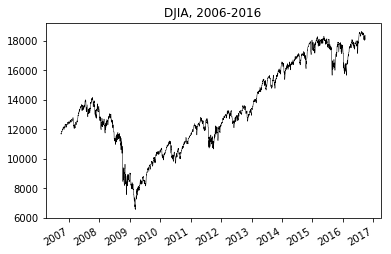

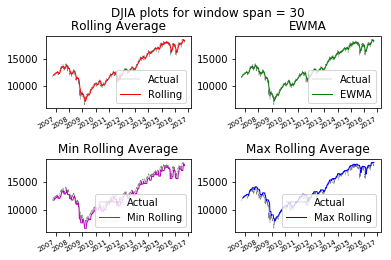

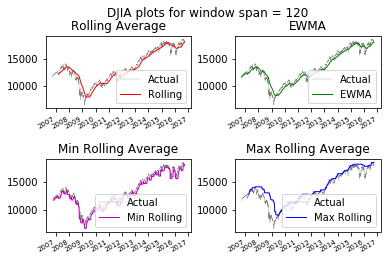

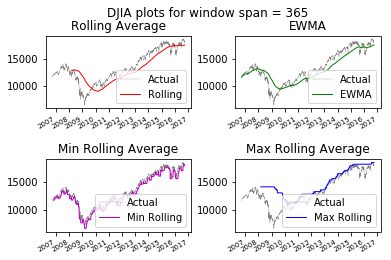


It appears that the approximation gets worse as you expand the window. This makes sense
because it is condensing the originally plotted set of points down to an even smaller 
resultant plotted set of points.
    


In [1765]:
problem6_6()